imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

SyntaxError: invalid syntax (<ipython-input-2-d960544c3de0>, line 1)

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.19, 0.42, 0.26, 0.31, 0.28, 0.57, 0.18, 0.19, 0.39]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'td def._dif', 'sub. avg._dif', 'td acc._dif', 'td avg._dif', 'td def._dif']


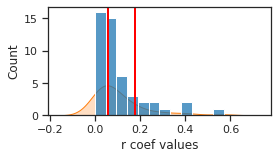

Data split: Data=(6731, 20), train_set=(3313, 12), validation_set=(1441, 12), test_set=(1977, 12)


100%|██████████| 15/15 [00:18<00:00,  1.21s/it]


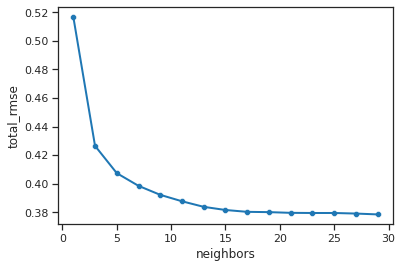

best performance n: 29
../global_variables/ml_models_parameters.csv saved.
../data/fight_stat_data.csv saved.
Model Accuracy: 0.686600


In [2]:
%run fight_stats_model_training.ipynb

### <span style='color:green'> **[done]** </span>Loading Features data

In [49]:
loc = '../data/'
file = 'fight_stat_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,set,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,train,Aleksandra Albu,Kailin Curran,win,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820,0.007043,0.007043,0.007043,0.007043
6729,train,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053,0.427403,0.427403,0.427403,0.427403
6730,test,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820,0.193870,0.193870,0.193870,0.193870


In [50]:
req_data = ['fighter','opponent']
y = ['result']
X = ['kd_dif','str_dif','str_dif','sub_dif',
    #'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    #'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

df = df[req_data + X + y]
df.tail(3)

,fighter,opponent,kd_dif,str_dif,str_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6728,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,-0.13660,0.000126,-0.017271,2.039564,0.562079,-2.148820,win
6729,Eric Shelton,Jarred Brooks,0.007043,0.16454,0.16454,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose
6730,Drew Dober,Joshua Burkman,1.361536,0.16454,0.16454,0.000126,1.488122,0.123202,-0.009943,-2.148820,win


### <span style='color:green'> **[done]** </span> SVM model training:

In [51]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 12), train_set=(3240, 10), validation_set=(1431, 10), test_set=(2060, 10)


,set,fighter,opponent,kd_dif,str_dif,str_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6728,train,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,-0.13660,0.000126,-0.017271,2.039564,0.562079,-2.148820,win
6729,train,Eric Shelton,Jarred Brooks,0.007043,0.16454,0.16454,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose
6730,test,Drew Dober,Joshua Burkman,1.361536,0.16454,0.16454,0.000126,1.488122,0.123202,-0.009943,-2.148820,win


In [68]:
svm_clf = set_svm_clf(X_columns=X, y_columns=y, data=df)
df = set_predictions(model=svm_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,fighter,opponent,kd_dif,str_dif,str_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,train,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,-0.13660,0.000126,-0.017271,2.039564,0.562079,-2.148820,win,lose
6729,train,Eric Shelton,Jarred Brooks,0.007043,0.16454,0.16454,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose,win
6730,test,Drew Dober,Joshua Burkman,1.361536,0.16454,0.16454,0.000126,1.488122,0.123202,-0.009943,-2.148820,win,win


In [ ]:
>>>>>>>>>>>>>>>>

In [67]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

SyntaxError: invalid syntax (<ipython-input-67-00b0f6224fe5>, line 1)

In [19]:
df = set_predictions(model=knn_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,fighter,opponent,result,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result_pred
6728,validation,Aleksandra Albu,Kailin Curran,win,0.153807,-0.248614,0.524829,-0.187746,0.590266,0.306904,0.520523,-1.257415,0.016113,2.032286,0.573098,-2.154226,win
6729,test,Jarred Brooks,Eric Shelton,win,0.956603,0.205996,0.759383,0.384288,-0.289007,0.306904,-0.108500,-0.079956,-0.304653,-0.011958,0.001105,-1.076953,win
6730,validation,Drew Dober,Joshua Burkman,win,-0.989064,-0.668254,-0.614435,-0.187746,1.121624,-0.260727,0.654877,0.004148,1.344545,0.115807,0.001105,-2.154226,lose


In [20]:
act = df.result[df.set=='test']
pred = df.result_pred[df.set=='test']
get_accuracy(act, pred)

0.652281746031746

### <span style='color:orange'> **[in-progress]** </span> Tune model parameters:

In [6]:
>>>>>>>>>>>>>>>>

SyntaxError: invalid syntax (<ipython-input-6-6708ddc79812>, line 1)

### <span style='color:green'> **[done]** </span> X = Feature definition:

In [ ]:
X = df.columns[10:len(df.columns)-1]
X

## <span style='color:green'> **[done]** </span> Clean(if needed) outliers for more accurate model


In [ ]:
rows= 2
cols= int(len(X)/2)
fig, axs = plt.subplots(rows,cols,figsize = (25,8))
fig.suptitle('Features Distributions')

for i in range(0,cols):
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'lose'], x=X[i], fill=True)
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'win'], x=X[i], fill=True)

for i in range(0,cols):
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'lose'], x=X[i+cols], fill=True)
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'win'], x=X[i+cols], fill=True)

for the most part fighter's sklill are similar when they meet in the octagon = not many outlier ( > 3 sigma data points).
i will clear any > 3 sigma data points

In [ ]:
original_size = len(df)

for feature in X:
    df = df[df[feature] <= 3]
    
print('Rows deleted: %d' %(original_size-len(df)))

### <span style='color:green'> **[done]** </span> EDA for predicting 'kd_dif', 'str_dif', 'td_dif', 'sub_dif' (=fight statistics)
all features are normalized > only correlated features will be included in finale model

In [ ]:
features = ['result','str_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('str_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='str_dif',x=column,data=df,hue='result')

In [ ]:
features = ['result','kd_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('kd_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='kd_dif',x=column,data=df,hue='result')

In [ ]:
features = ['result','td_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('td_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='td_dif',x=column,data=df,hue='result')

only ['td avg._dif','td def._dif','str. acc._dif'] have correlation to td_dif  = will include as feature

In [ ]:
features = ['result','sub_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('sub_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='sub_dif',x=column,data=df,hue='result')

### <span style='color:green'> [done] </span> Correlations Report:

In [ ]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in features[1:]:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

features with R coef > red line is significant enough to be included

In [ ]:
X_columns = sig_features
X_columns

In [ ]:
fdf = (df[X_columns]).copy()
for y_column in ['kd_dif','str_dif','td_dif','sub_dif']:
    fdf[y_column] = df[y_column]

fdf['fighter'] = df['fighter']
fdf['opponent'] = df['opponent']
fdf['result'] = df['result']
fdf = (fdf.dropna()).reset_index(drop=True)
fdf.head()

In [ ]:
X = fdf[X_columns]
y_columns = fdf.columns[fdf.columns.get_loc('kd_dif'):fdf.columns.get_loc('kd_dif')+4]
y = fdf[y_columns]

print('X = ' + str(X_columns))
print('y = '+ str(y_columns))

### <span style='color:green'> **[done]** </span> Splitting data to Training set/Test set/Validation:

### <span style='color:green'> **[done]** </span> Predicting Fight stats:

#### <span style='color:green'> **[done]** </span> Train KNN Classifier:

In [ ]:
data =fdf
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=data, test_size=0.3, valid_size=0.1)
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=data, n=5)
fdf = set_predictions(model=knn_reg, data=data, X_columns=X_columns, y_columns=y_columns)
knn_reg
fdf.tail(3)

## <span style='color:green'> **[done]** </span> Tune Model parameters:

In [ ]:
traindf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=fdf, test_size=0.3, valid_size=0.1)

for n in np.arange(1,50,5):
    index = len(traindf)
    traindf.loc[index, 'neighbors'] = n
    
    knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
    fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
    
    for stat in y_columns:
        y_val_act = fdf[stat][fdf.set=='validation']
        y_val_pred = fdf[stat+'_pred'][fdf.set=='validation']
        traindf.loc[index, stat+'_rmse'] = get_rmse(act=y_val_act, pred=y_val_pred)

    traindf.loc[index,'rmse'] = 0.25 * (traindf.loc[index,'kd_dif_rmse'] + traindf.loc[index,'str_dif_rmse'] + traindf.loc[index,'td_dif_rmse'] + traindf.loc[index,'sub_dif_rmse'])
    
traindf

In [ ]:
min_rmse = np.min(traindf['rmse'])
opt_n = np.min(traindf['neighbors'][traindf.rmse == min_rmse])

for stat in ['kd','str','td','sub']:
    g = sns.lineplot(data=traindf, y=stat + '_dif_rmse', x='neighbors', label=stat + '_dif RMSE%')
    
g = sns.lineplot(data=traindf, y='rmse', x='neighbors', label='RMSE%') 
g = sns.lineplot(y=traindf['rmse'], x= opt_n) 

g.set_title('RMSE% error vs model complexity', fontsize=15)
g.set_xlabel('n_neigbors', fontsize=14)
g.set_ylabel('RMSE%', fontsize=14)
g.legend()

print('Best Tuned Model(=min neighbors + min average_rmse error):')
best_model = traindf[traindf.neighbors == opt_n]
best_model

best model is average model for as many neighbors as possible, but it doesnt get a lot better after 6 neighbors,
so im choosing simple n=6 model to work with

In [ ]:
n = np.min(best_model['neighbors'])
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
knn_reg

### <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

In [ ]:
testdf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])

for stat in y_columns:
    testdf.loc[index, 'neighbors'] = n
    y_test_act = fdf[stat][fdf.set=='test']
    y_test_pred = fdf[stat+'_pred'][fdf.set=='test']
    testdf.loc[index, stat+'_rmse'] = get_rmse(act=y_test_act, pred=y_test_pred)

testdf.loc[index,'rmse'] = 0.25 * (testdf.loc[index,'kd_dif_rmse'] + testdf.loc[index,'str_dif_rmse'] + testdf.loc[index,'td_dif_rmse'] + testdf.loc[index,'sub_dif_rmse'])
    
print('RMSE% for fight stat:')
testdf

### <span style='color:green'> **[done]** </span> Opt Model view:

In [ ]:
rows=1
cols=4
data = fdf[fdf.set == 'test']
plt.figure(figsize = (12,15))
fig, axs = plt.subplots(rows,cols,figsize = (20,3))
fig.suptitle('Visualization of predicted(=orange) vs actual(=blue) Train_set values:')

sns.kdeplot(ax=axs[0],x=data['kd_dif'],fill=True)
sns.kdeplot(ax=axs[0],x=data['kd_dif_pred'],fill=True)

sns.kdeplot(ax=axs[1],x=data['str_dif'],fill=True)
sns.kdeplot(ax=axs[1],x=data['str_dif_pred'],fill=True)

sns.kdeplot(ax=axs[2],x=data['td_dif'],fill=True)
sns.kdeplot(ax=axs[2],x=data['td_dif_pred'],fill=True)

sns.kdeplot(ax=axs[3],x=data['sub_dif'],fill=True)
sns.kdeplot(ax=axs[3],x=data['sub_dif_pred'],fill=True)

we can see that model predicting the average stat produce the best model (= the features is not very strong predictors)

### <span style='color:green'> **[done]** </span> Predicting Fight outcome (=win/lose):

In [ ]:
X_columns = list(df.columns[18:len(df.columns)])
fight_stats = ['kd_dif','str_dif','td_dif','sub_dif']
X_columns.extend(fight_stats)
y_columns = 'result'
print(X_columns)
print(y_columns)

In [ ]:
pdf = (df[X_columns]).copy()
pdf[y_columns] = df[y_columns]
pdf = (pdf.dropna()).reset_index(drop=True)
pdf.tail(3)

## <span style='color:green'> **[done]** </span> Train Random Forest model:

In [ ]:
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf,tree_depth=2, n_estimators=100 )
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Score: ' + str(get_accuracy(act=pdf['result'], pred=pdf['result_pred'])))
forest_clf

## <span style='color:green'> **[done]** </span> Tune model parameters:

In [ ]:
traindf = pd.DataFrame(columns=['n_trees','accuracy'])
pdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=pdf, test_size=0.3, valid_size=0.2)

for n in range(1,200,1):

    index = len(traindf)
    traindf.loc[index, 'n_trees'] = n
    
    forest_clf = set_forest_clf(X_columns=X_columns, y_columns=y_columns, data=pdf, n_estimators=n, tree_depth=len(X_columns))
    pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
    
    y_val_act = pdf['result'][pdf.set=='validation']
    y_val_pred = pdf['result_pred'][pdf.set=='validation']

    traindf.loc[index, 'accuracy'] = get_accuracy(act=y_val_act, pred=y_val_pred)
    
traindf

In [ ]:
print('Best Parameters:')
best_acc = traindf.accuracy.max()
t = traindf[traindf.accuracy == best_acc]
t = t[t.n_trees == t.n_trees.min()].reset_index(drop=True)
sns.lineplot(y='accuracy', x='n_trees', data=traindf)
t.head()

In [ ]:
n_trees = np.min(t.n_trees)
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf, n_estimators=n_trees, tree_depth=len(X_columns))
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Accuracy: ' + str(get_accuracy(act=pdf['result'][pdf.set=='test'], pred=pdf['result_pred'][pdf.set=='test'])))
forest_clf

In [ ]:
rows=2
cols=len(X_columns)
data = pdf[pdf.set == 'test']
fig, axs = plt.subplots(rows,cols,figsize = (21,4))
fig.suptitle('Visualization of loser(=orange) vs winner(=blue) Test_set distribution: row[0]:actual, row[1]:predicted')

for feature,col in zip(X_columns,range(0,cols)):
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'win'], fill=True)
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'lose'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'win'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'lose'], fill=True)


## <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_act = pdf['result'][pdf.set=='test']
y_test_pred = pdf['result_pred'][pdf.set=='test']

print('Accuracy = %.6f' % accuracy_score(y_test_act,y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test_act,y_test_pred)  

In [ ]:
pdf.to_csv('../data/ufc_data_trained.csv')